# Small Project Notebook
Suhas Sahu (1003370) <br>
Sidharth Praveenkumar (1003647)

## Table of Contents 
* Importing the necessary libraries 
* File Preperation 
* Dataset Class Distribution 
* Three-Class Classifier 
* Binary Classifier 
* Visualising the Predictions
* Loading a sample model

## Importing the Necessary Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms
import os
%matplotlib inline
from lung_data_loader import Lung_Dataset
from IPython.display import Image

## File Preparation 
If you would like to use the upsampling function below, do uncomment and run the code snippets in this section to reindex the training files. Following that do copy over the original training data (i.e. from the original dataset in train/normal and train/infected/covid) for all the classes into the file. This will result in doubling the original dataset for train/normal and train/infected/covid.

In [ ]:
#train_normal_loc = "/home/jovyan/trial_test//dataset_trial/train/normal/"
#train_infected_covid = "/home/jovyan/trial_test/dataset_trial/train/infected/covid/"

In [ ]:
# '''Renaming to enable copying of train normal data'''
# import os
# os.chdir("train_normal_loc")
# dir_len = len(os.listdir(train_normal_loc))
# i = dir_len
# for file in os.listdir(train_normal_loc):
#     os.rename(file, str(i)+".jpg")
#     print(str(i)+".jpg")
#     i += 1

    
# print('Done')
# print(len(os.listdir(train_normal_loc)))

In [ ]:
# '''Renaming to enable copying of train covid data'''
# import os
# os.chdir(train_infected_covid)
# dir_len = len(os.listdir(train_infected_covid))
# i = dir_len
# for file in os.listdir(train_infected_covid):
#     os.rename(file, str(i)+".jpg")
#     print(str(i)+".jpg")
#     i += 1

    
# print('Done')
# print(len(os.listdir(train_infected_covid)))

## Dataset Class Distribution
Provide code for upsampling data 

### Without Upsampling

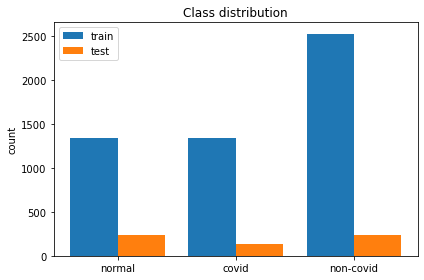

In [5]:
from plots import plot_bar
plot_bar(dataset_type='normal')

### With Upsampling

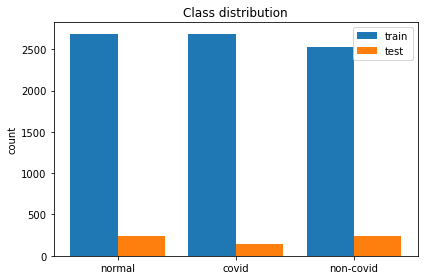

In [6]:
plot_bar(dataset_type='upsample')

## Three-Class Classifier

### Base Model 
Model without augmentation, preprocesing, LR scheduler and regularsation

In [44]:
torch.cuda.empty_cache()
!python ./train_multiclass.py --gpu --epochs 25 --batchsize 32 --upsample False --transform False --scheduler False --decay False

Training the first model to classify normal, infected and covid images
Epoch: 1/25 @ 2021-03-21 15:09:18.606613 


Training set: Average loss: 0.0251, Accuracy: 4999/7902 (63%)

Validation set: Average loss: 0.8766, Accuracy: 372/615 (60%)

Epoch: 2/25 @ 2021-03-21 15:09:41.037145 


Training set: Average loss: 0.0200, Accuracy: 5594/7902 (71%)

Validation set: Average loss: 1.0277, Accuracy: 374/615 (61%)

Epoch: 3/25 @ 2021-03-21 15:09:59.962836 


Training set: Average loss: 0.0182, Accuracy: 5736/7902 (73%)

Validation set: Average loss: 2.5348, Accuracy: 296/615 (48%)

Epoch: 4/25 @ 2021-03-21 15:10:18.457881 


Training set: Average loss: 0.0170, Accuracy: 5937/7902 (75%)

Validation set: Average loss: 0.8429, Accuracy: 437/615 (71%)

Epoch: 5/25 @ 2021-03-21 15:10:37.152981 


Training set: Average loss: 0.0164, Accuracy: 6036/7902 (76%)

Validation set: Average loss: 0.7988, Accuracy: 430/615 (70%)

Epoch: 6/25 @ 2021-03-21 15:10:55.945936 


Training set: Average loss: 0.0157,

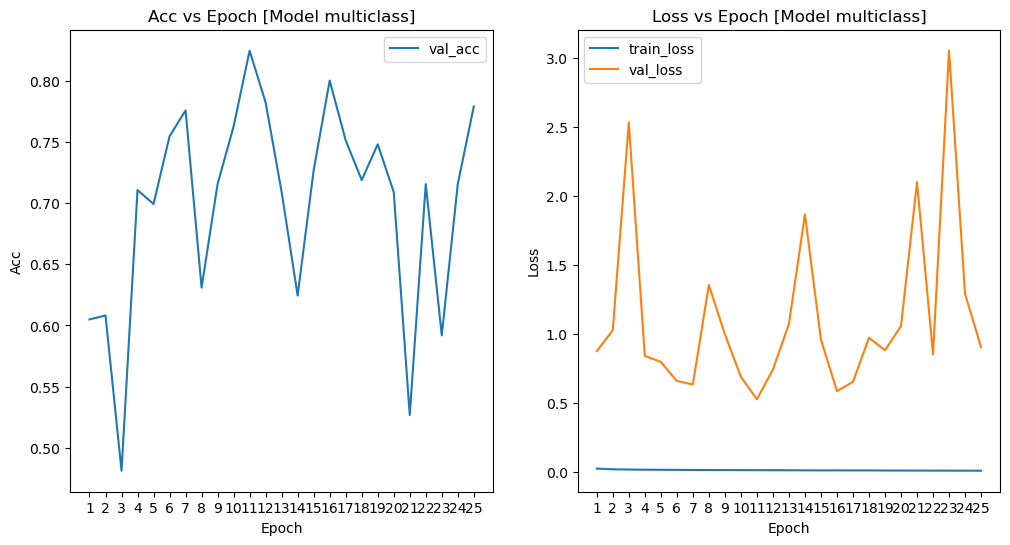

In [45]:
Image('model_multiclass_graph.png', width=600, height=300)

### Model with Augmentation and Preprocessing
Model with augmentation, preprocesing but wihtout LR scheduler and regularsation

In [46]:
torch.cuda.empty_cache()
!python ./train_multiclass.py --gpu --epochs 25 --batchsize 32 --upsample True --transform True --scheduler False --decay False

Training the first model to classify normal, infected and covid images
Epoch: 1/25 @ 2021-03-21 15:17:15.641401 


Training set: Average loss: 0.0244, Accuracy: 5104/7902 (65%)

Validation set: Average loss: 1.0690, Accuracy: 327/615 (53%)

Epoch: 2/25 @ 2021-03-21 15:17:34.759579 


Training set: Average loss: 0.0191, Accuracy: 5667/7902 (72%)

Validation set: Average loss: 0.6647, Accuracy: 478/615 (78%)

Epoch: 3/25 @ 2021-03-21 15:17:53.566880 


Training set: Average loss: 0.0175, Accuracy: 5822/7902 (74%)

Validation set: Average loss: 1.0854, Accuracy: 354/615 (58%)

Epoch: 4/25 @ 2021-03-21 15:18:12.331260 


Training set: Average loss: 0.0166, Accuracy: 5956/7902 (75%)

Validation set: Average loss: 0.7589, Accuracy: 439/615 (71%)

Epoch: 5/25 @ 2021-03-21 15:18:30.994916 


Training set: Average loss: 0.0162, Accuracy: 6031/7902 (76%)

Validation set: Average loss: 0.7511, Accuracy: 431/615 (70%)

Epoch: 6/25 @ 2021-03-21 15:18:49.311665 


Training set: Average loss: 0.0155,

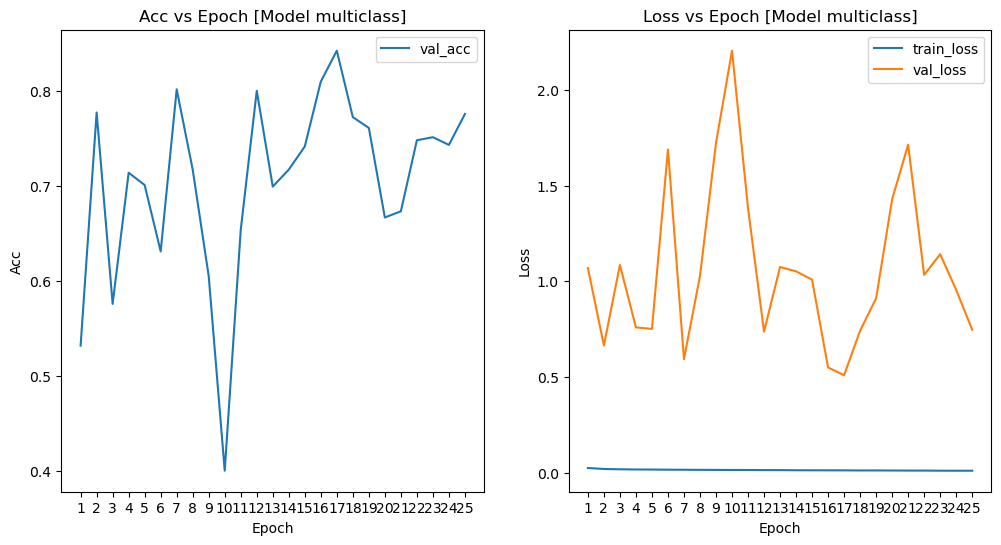

In [47]:
Image('model_multiclass_graph.png', width=600, height=300)

### Model with LR Scheduler, Regularsiation, Augmentation and Preprocessing
Model with augmentation, preprocesing but wihtout LR scheduler and regularsation

In [37]:
torch.cuda.empty_cache()
!python ./train_multiclass.py --gpu --epochs 25 --batchsize 32 --upsample True --transform True --scheduler True --decay True

Training the first model to classify normal, infected and covid images
Epoch: 1/25 @ 2021-03-21 14:41:34.351237 


Training set: Average loss: 0.0236, Accuracy: 5127/7902 (65%)

Validation set: Average loss: 1.0672, Accuracy: 397/615 (65%)

Epoch: 2/25 @ 2021-03-21 14:41:56.953345 


Training set: Average loss: 0.0189, Accuracy: 5638/7902 (71%)

Validation set: Average loss: 0.8793, Accuracy: 399/615 (65%)

Epoch: 3/25 @ 2021-03-21 14:42:15.868992 


Training set: Average loss: 0.0179, Accuracy: 5766/7902 (73%)

Validation set: Average loss: 0.9933, Accuracy: 414/615 (67%)

Epoch: 4/25 @ 2021-03-21 14:42:34.284118 


Training set: Average loss: 0.0167, Accuracy: 5970/7902 (76%)

Validation set: Average loss: 1.4437, Accuracy: 385/615 (63%)

Epoch: 5/25 @ 2021-03-21 14:42:53.306700 


Training set: Average loss: 0.0158, Accuracy: 6095/7902 (77%)

Validation set: Average loss: 1.9069, Accuracy: 353/615 (57%)

Epoch: 6/25 @ 2021-03-21 14:43:12.445007 


Training set: Average loss: 0.0150,

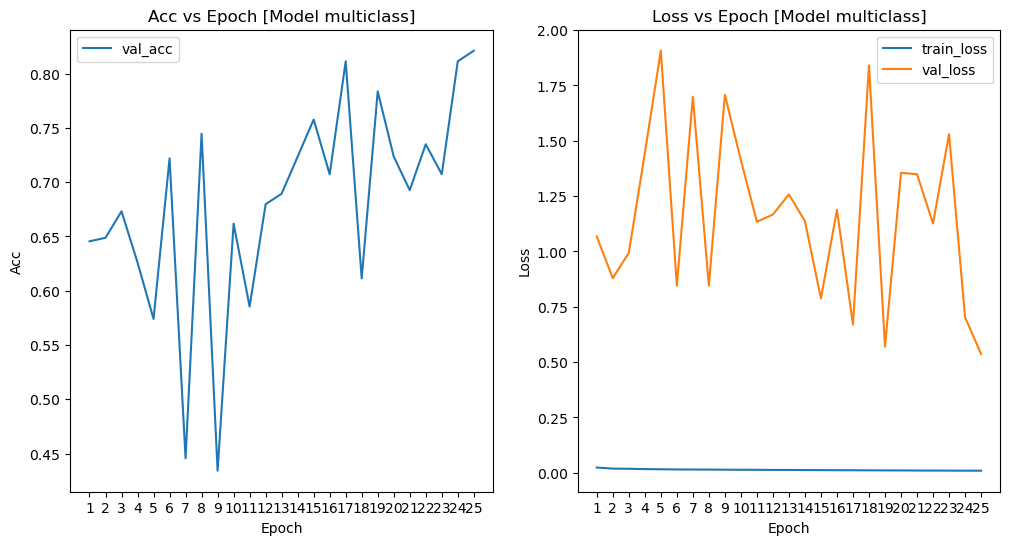

In [38]:
Image('model_multiclass_graph.png', width=600, height=300)

## Binary Classifier

### Base Model 
Model without augmentation, preprocesing, LR scheduler and regularsation

In [23]:
torch.cuda.empty_cache()
!python ./train_binary.py --gpu --epochs 25 --batchsize 32 --upsample False --transform False --scheduler False --decay False

Training first classifier(between normal and infected images):

Epoch: 1/25 @ 2021-03-21 07:18:18.454450 
 Training Loss: 0.307 -  Validation Loss: 0.469 -  Validation Accuracy: 78.049
Epoch: 2/25 @ 2021-03-21 07:18:27.727683 
 Training Loss: 0.190 -  Validation Loss: 0.645 -  Validation Accuracy: 72.846
Epoch: 3/25 @ 2021-03-21 07:18:36.849447 
 Training Loss: 0.166 -  Validation Loss: 0.446 -  Validation Accuracy: 82.439
Epoch: 4/25 @ 2021-03-21 07:18:45.915598 
 Training Loss: 0.163 -  Validation Loss: 2.294 -  Validation Accuracy: 64.715
Epoch: 5/25 @ 2021-03-21 07:18:55.078452 
 Training Loss: 0.151 -  Validation Loss: 0.370 -  Validation Accuracy: 84.715
Epoch: 6/25 @ 2021-03-21 07:19:04.253104 
 Training Loss: 0.148 -  Validation Loss: 1.177 -  Validation Accuracy: 70.569
Epoch: 7/25 @ 2021-03-21 07:19:13.267808 
 Training Loss: 0.136 -  Validation Loss: 1.428 -  Validation Accuracy: 67.154
Epoch: 8/25 @ 2021-03-21 07:19:22.453439 
 Training Loss: 0.128 -  Validation Loss: 0.920

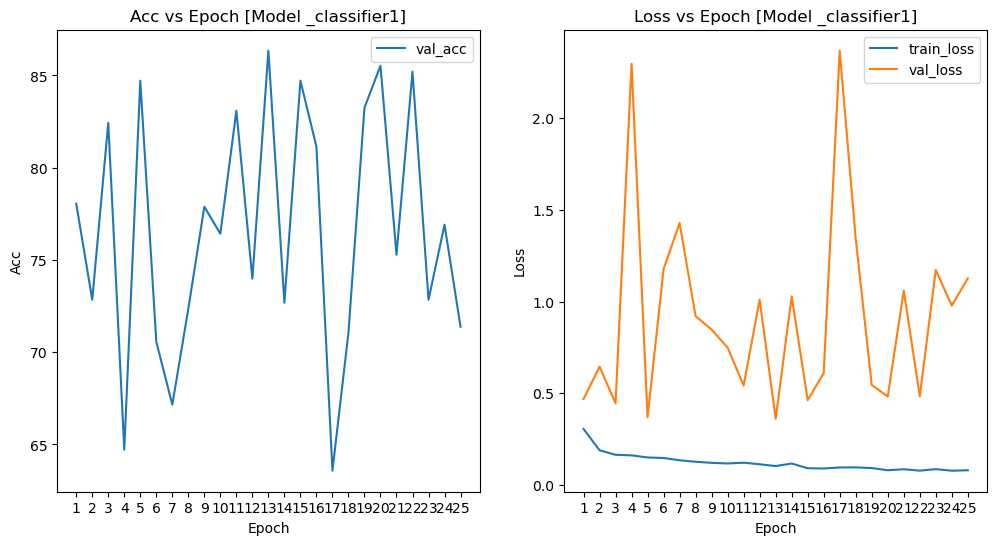

In [24]:
Image('model_classifier1_graph.png', width=600, height=300)

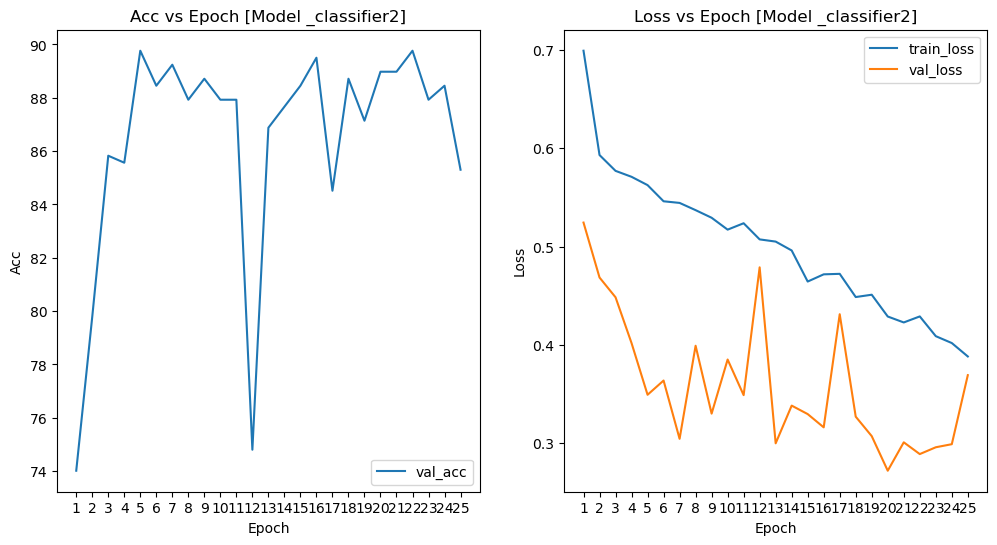

In [25]:
Image('model_classifier2_graph.png', width=600, height=300)

### Model with Augmentation and Preprocessing
Model with augmentation, preprocesing but without LR scheduler and regularsation

In [26]:
torch.cuda.empty_cache()
!python ./train_binary.py --gpu --epochs 25 --batchsize 32 --upsample True --transform True --scheduler False --decay False

Training first classifier(between normal and infected images):

Epoch: 1/25 @ 2021-03-21 07:25:09.046463 
 Training Loss: 0.327 -  Validation Loss: 1.296 -  Validation Accuracy: 63.089
Epoch: 2/25 @ 2021-03-21 07:25:18.459945 
 Training Loss: 0.191 -  Validation Loss: 0.650 -  Validation Accuracy: 75.285
Epoch: 3/25 @ 2021-03-21 07:25:27.533172 
 Training Loss: 0.179 -  Validation Loss: 1.276 -  Validation Accuracy: 64.553
Epoch: 4/25 @ 2021-03-21 07:25:36.770169 
 Training Loss: 0.163 -  Validation Loss: 0.608 -  Validation Accuracy: 75.122
Epoch: 5/25 @ 2021-03-21 07:25:45.811191 
 Training Loss: 0.144 -  Validation Loss: 0.372 -  Validation Accuracy: 84.878
Epoch: 6/25 @ 2021-03-21 07:25:54.972170 
 Training Loss: 0.149 -  Validation Loss: 0.402 -  Validation Accuracy: 84.065
Epoch: 7/25 @ 2021-03-21 07:26:03.888146 
 Training Loss: 0.126 -  Validation Loss: 0.398 -  Validation Accuracy: 81.951
Epoch: 8/25 @ 2021-03-21 07:26:12.854286 
 Training Loss: 0.116 -  Validation Loss: 0.408

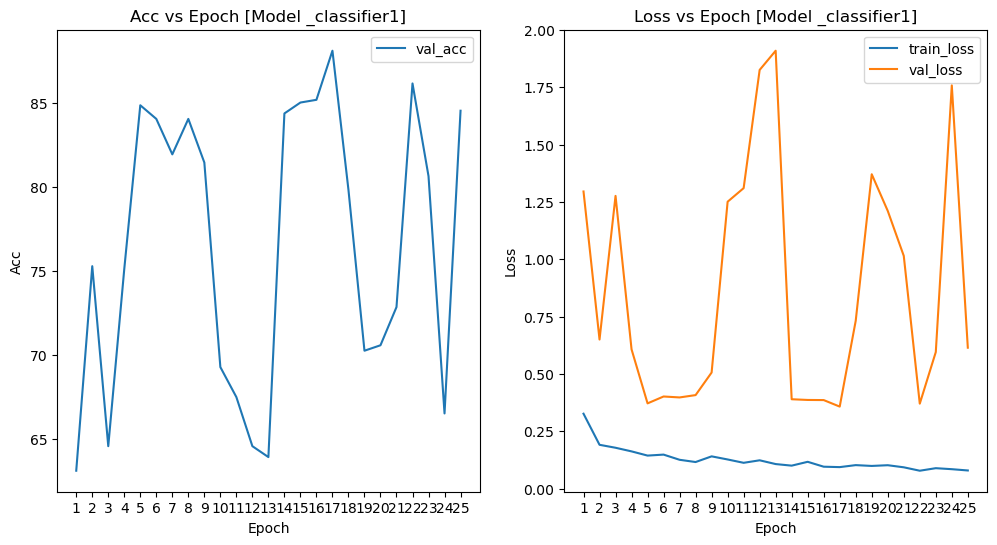

In [27]:
Image('model_classifier1_graph.png', width=600, height=300)

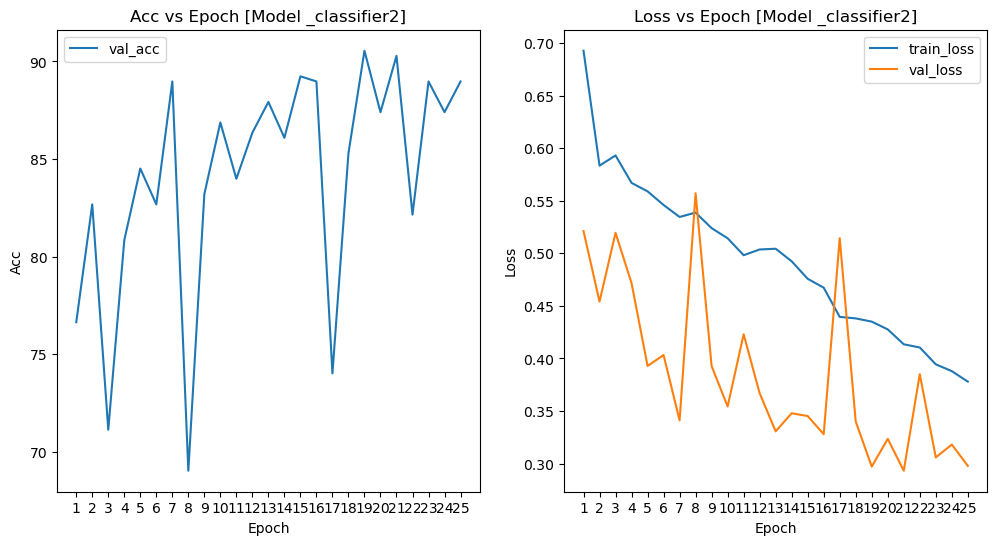

In [28]:
Image('model_classifier2_graph.png', width=600, height=300)

### Model with LR Scheduler, Regularsiation, Augmentation and Preprocessing
Model with augmentation, preprocesing but wihtout LR scheduler and regularsation

In [29]:
torch.cuda.empty_cache()
!python ./train_binary.py --gpu --epochs 25 --batchsize 32 --upsample True --transform True --scheduler True --decay True

Training first classifier(between normal and infected images):

Epoch: 1/25 @ 2021-03-21 07:31:52.205894 
 Training Loss: 0.379 -  Validation Loss: 0.449 -  Validation Accuracy: 79.350
Epoch: 2/25 @ 2021-03-21 07:32:01.615632 
 Training Loss: 0.214 -  Validation Loss: 0.632 -  Validation Accuracy: 72.033
Epoch: 3/25 @ 2021-03-21 07:32:10.710201 
 Training Loss: 0.182 -  Validation Loss: 0.810 -  Validation Accuracy: 72.358
Epoch: 4/25 @ 2021-03-21 07:32:19.827699 
 Training Loss: 0.158 -  Validation Loss: 0.638 -  Validation Accuracy: 77.073
Epoch: 5/25 @ 2021-03-21 07:32:28.956714 
 Training Loss: 0.167 -  Validation Loss: 0.406 -  Validation Accuracy: 82.764
Epoch: 6/25 @ 2021-03-21 07:32:38.250281 
 Training Loss: 0.136 -  Validation Loss: 0.627 -  Validation Accuracy: 79.350
Epoch: 7/25 @ 2021-03-21 07:32:47.100528 
 Training Loss: 0.149 -  Validation Loss: 0.647 -  Validation Accuracy: 78.049
Epoch: 8/25 @ 2021-03-21 07:32:56.200958 
 Training Loss: 0.134 -  Validation Loss: 0.637

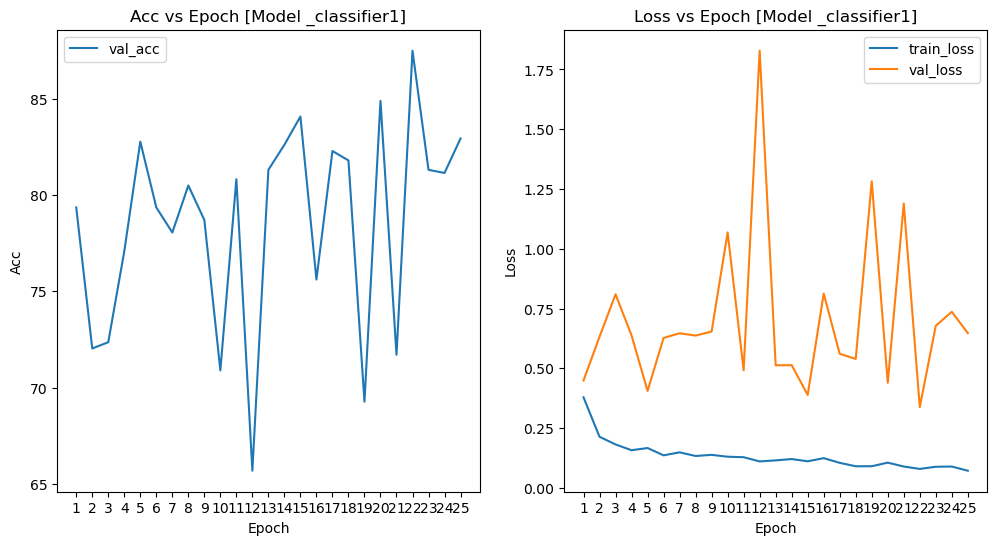

In [30]:
Image('model_classifier1_graph.png', width=600, height=300)

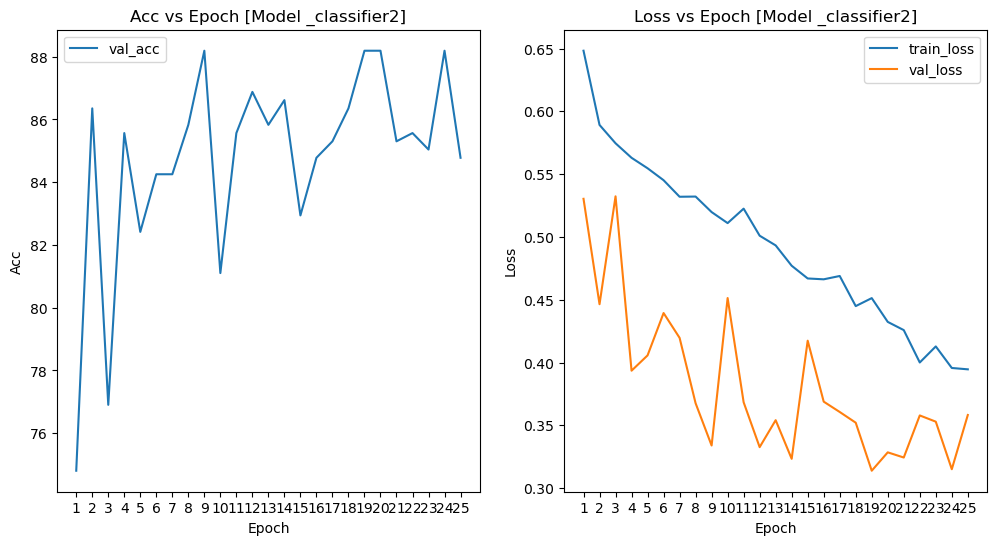

In [31]:
Image('model_classifier2_graph.png', width=600, height=300)

## Visualising the Predictions
Visualise the predictions on the 24 images provided

<Figure size 1440x1440 with 0 Axes>

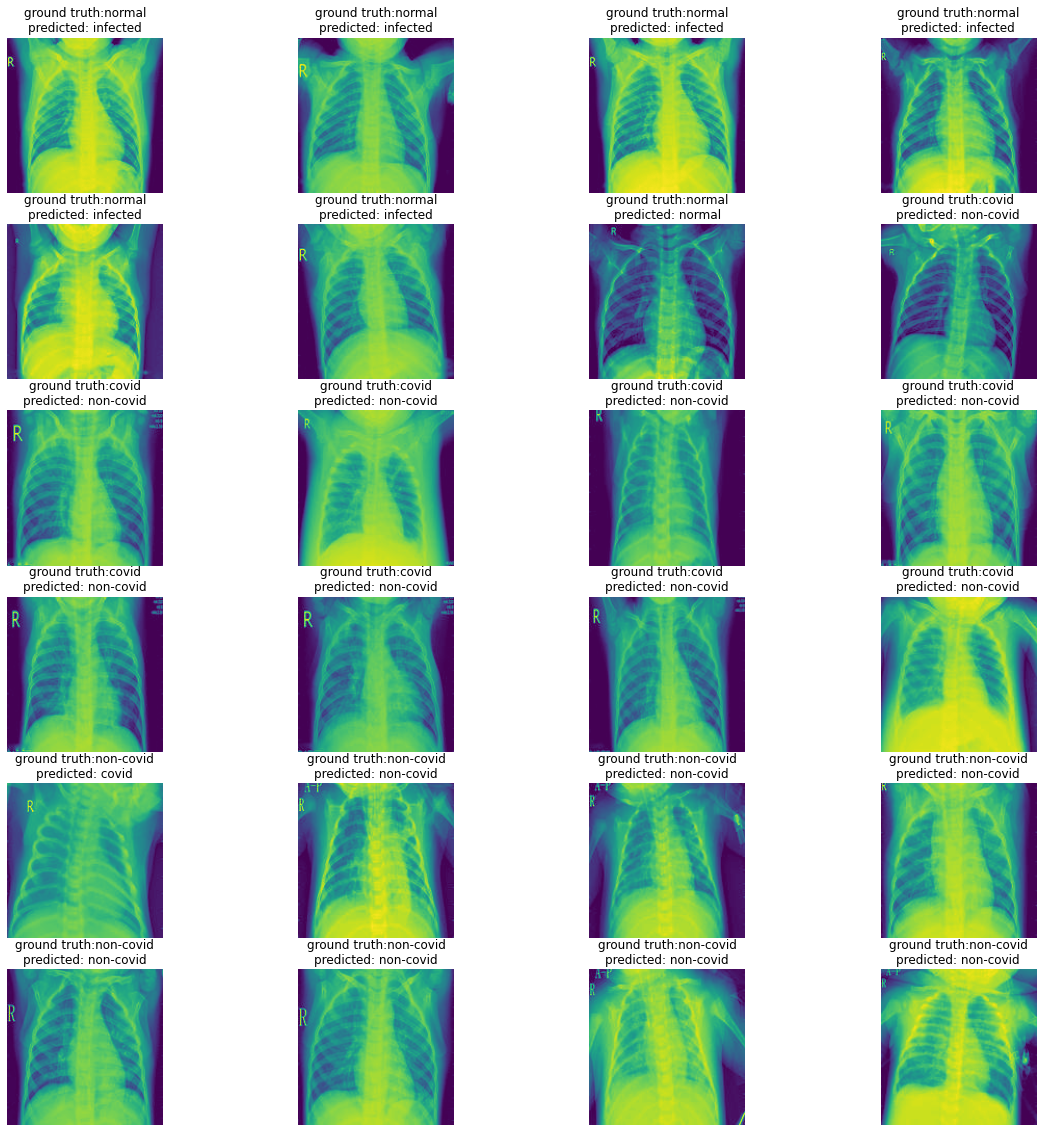

In [23]:
from train_binary import load_model

col = 4
row = 6
w = 20
h = 20
fig = plt.figure(figsize = (20,20))
ld_val_1 = Lung_Dataset('val', 0)
ld_val_2 = Lung_Dataset('val', 2)   
val_loader_1 = DataLoader(ld_val_1, batch_size=1, shuffle=False)
val_loader_2 = DataLoader(ld_val_2, batch_size=1, shuffle=False)

fig = plt.figure(figsize = (20,20))
model = load_model('model_2021_03_21-07:34:47_AM.pt')
device = 'cuda'
model.to(device)
model.eval()
res = []

with torch.no_grad():
        for data, target in val_loader_1:
            data, target = data.to(device), target.to(device)
            target = target.argmax(dim=1, keepdim=True).float()
            output = model.forward(data)
            pred = torch.round(output)
            
            for i,j in zip(pred, target):
#                 print(i,j)
                if(i==j):
                    res.append((data, i, True))
                else:
                    res.append((data, i, False))

res = res[0:8]
with torch.no_grad():
        for data, target in val_loader_2:
            data, target = data.to(device), target.to(device)
            target = target.argmax(dim=1, keepdim=True).float()
            output = model.forward(data)
            pred = torch.round(output)
            
            for i,j in zip(pred, target):
#                 print(i,j)
                if(i==j):
                    res.append((data, i, True))
                else:
                    res.append((data, i, False))
                    
j = 1
for i in res[:-1]:
    arr = i[0]
    arr_ = np.squeeze(arr.cpu()) # you can give axis attribute if you wanna squeeze in specific dimension
    k = fig.add_subplot(row, col, j)
    if j <=7:
        if i[2] == True:    
            k.title.set_text("ground truth:normal\npredicted: normal")
        else:
            k.title.set_text("ground truth:normal\npredicted: infected")
    elif j>7 and j<17:
        if i[2] == True:    
            k.title.set_text("ground truth:covid\npredicted: covid")
        else:
            k.title.set_text("ground truth:covid\npredicted: non-covid")
    else:
        if i[2] == True:    
            k.title.set_text("ground truth:non-covid\npredicted: non-covid")
        else:
            k.title.set_text("ground truth:non-covid\npredicted: covid")
    j+=1        
            

    plt.imshow(arr_)
    plt.axis('off')
plt.show()



## To load a sample dataset and test

In [22]:
torch.cuda.empty_cache()
!python ./train_binary.py --gpu --sample True

tensor([[156.,  78.],
        [ 15., 366.]])
Test set accuracy:  84.8780487804878 %
